In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [7]:
sf = pd.read_csv('../hessi.solar.flare.2002to2016.csv')

In [8]:
print(sf.columns)

Index(['flare', 'start.date', 'start.time', 'peak', 'end', 'duration.s',
       'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec', 'y.pos.asec',
       'radial', 'active.region.ar', 'flag.1', 'flag.2', 'flag.3', 'flag.4',
       'flag.5'],
      dtype='object')


In [9]:
x = sf['duration.s']

In [10]:
plt.hist(x, color='red')

(array([  6.85450000e+04,   3.03930000e+04,   9.31000000e+03,
          3.29500000e+03,   1.35600000e+03,   6.00000000e+02,
          2.44000000e+02,   1.15000000e+02,   7.50000000e+01,
          9.00000000e+00]),
 array([    8. ,   451.6,   895.2,  1338.8,  1782.4,  2226. ,  2669.6,
         3113.2,  3556.8,  4000.4,  4444. ]),
 <a list of 10 Patch objects>)

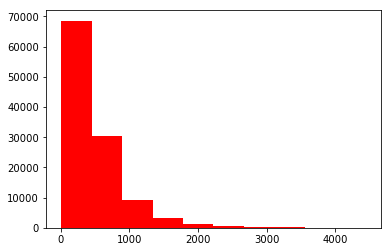

In [11]:
plt.show()

In [12]:
# This histogram certainly fits with my undereducated expectations:  most solar flares are of relatively brief
# duration, and fewer and fewer flares occur with increasing duration.  It looks like a negative exponential
# distribution, but more sophisticated analysis would be required to peg the parameters.  Let's amuse our
# statistical imaginations with a boxplot.

In [13]:
plt.boxplot(x)

{'boxes': [<matplotlib.lines.Line2D at 0x10adc35c0>],
 'caps': [<matplotlib.lines.Line2D at 0x10adc9f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x10adda860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10add49b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10adc3f28>,
  <matplotlib.lines.Line2D at 0x10adc9780>]}

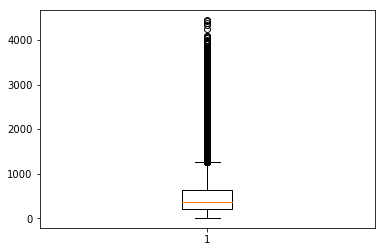

In [14]:
plt.show()


In [15]:
# I'm sorry, but a solid string of "outliers" such as this indicates that these observations aren't really
# outliers at all, 1.5 IQR rule notwithstanding.  By definition, an outlier is an observation which "breaks
# the pattern" -- but these are clearly PART of the pattern and are not exceptional.  Relying on hard-and-fast
# formulas such as the 1.5 IQR rule for determining which observations constitute outliers, rather than expertise
# in the topic to which we seek to apply statistical methods, is generally a mistake.
#
# Now we examine the relationship between solar flare duration and the number of peaks in energy emissions during
# the flare.

In [16]:
plt.scatter( x = sf['duration.s'], y = sf['peak.c/s'] )

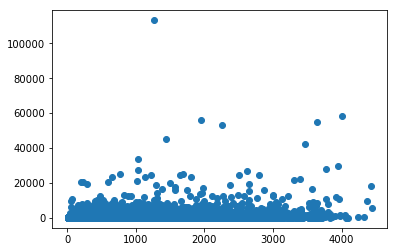

In [17]:
plt.show()

In [18]:
# YIKES, what a miserable scatterplot!  I can't tell WHAT the hell is going on here.  CLEARLY we need to do some re-
# expression.  The x's and the y's seem to be lumped toward the bottom end.  I'm thinking log-log, but we need to
# make sure we have no zeroes in either variable (recall that no logarithm is defined at zero)

In [19]:
sf = sf[ ~( ( sf[ 'duration.s' ] == 0 ) | ( sf[ 'peak.c/s' ] == 0 ) ) ]

In [20]:
plt.scatter( x = np.log(sf['duration.s']), y = np.log(sf['peak.c/s']))

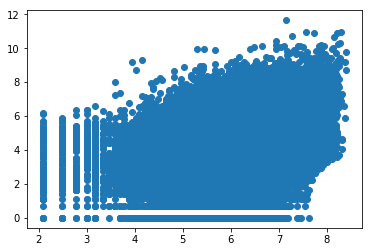

In [21]:
plt.show()


In [22]:
# OK, so the re-expression peeled that mess away from the x-axis.  It did not succeed in producing a linear
# scatterplot.  There appears to be a systematic curvature.  Let's push this just a bit further by squaring the
# y coordinates.

In [23]:
plt.scatter( x = np.log(sf['duration.s']), y = np.log(sf['peak.c/s'])*np.log(sf['peak.c/s']))

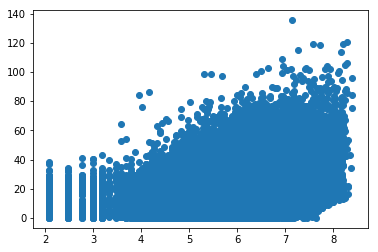

In [24]:
plt.show()

In [25]:
# Better.  Not there yet, but I'm going to give up at this point.  It's such a funky little lump of a scatterplot,
# I'm not sure more fiddlin' will produce something we'd want to call "linear."  It certainly makes sense to me, with
# absolutely no understanding of astrophysics, that there would be a positive association between the duration of a
# solar flare and the number of energy emission peaks witnessed during the flare.  I have no intuition as to whether
# that relationship ought to be linear (or quadratic, or polynomial in any sense, or exponential, ...).

In [68]:
# Data supplied via https://www.kaggle.com/khsamaha/solar-flares-rhessi